## 00 packages

In [1]:
##########################################################################################
##########################################################################################

import networkx as nx

from shapely.geometry import Point,Polygon

import math

import random

##########################################################################################
##########################################################################################

import numpy as np

import pandas as pd

##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

from itertools import combinations, permutations

from itertools import islice

##########################################################################################
##########################################################################################

import copy


### 01 parameters

In [2]:
##########################################################################################
##########################################################################################

alpha=1

batch_interval=1

##########################################################################################
##########################################################################################

instance='01'

speed=10000/60

Lockers=np.load("./01network/"+instance+"/Lockers.npy")

Lockers=tuple([(x[0],x[1]) for x in Lockers])


### 01 Comparision of the latest compeletion time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


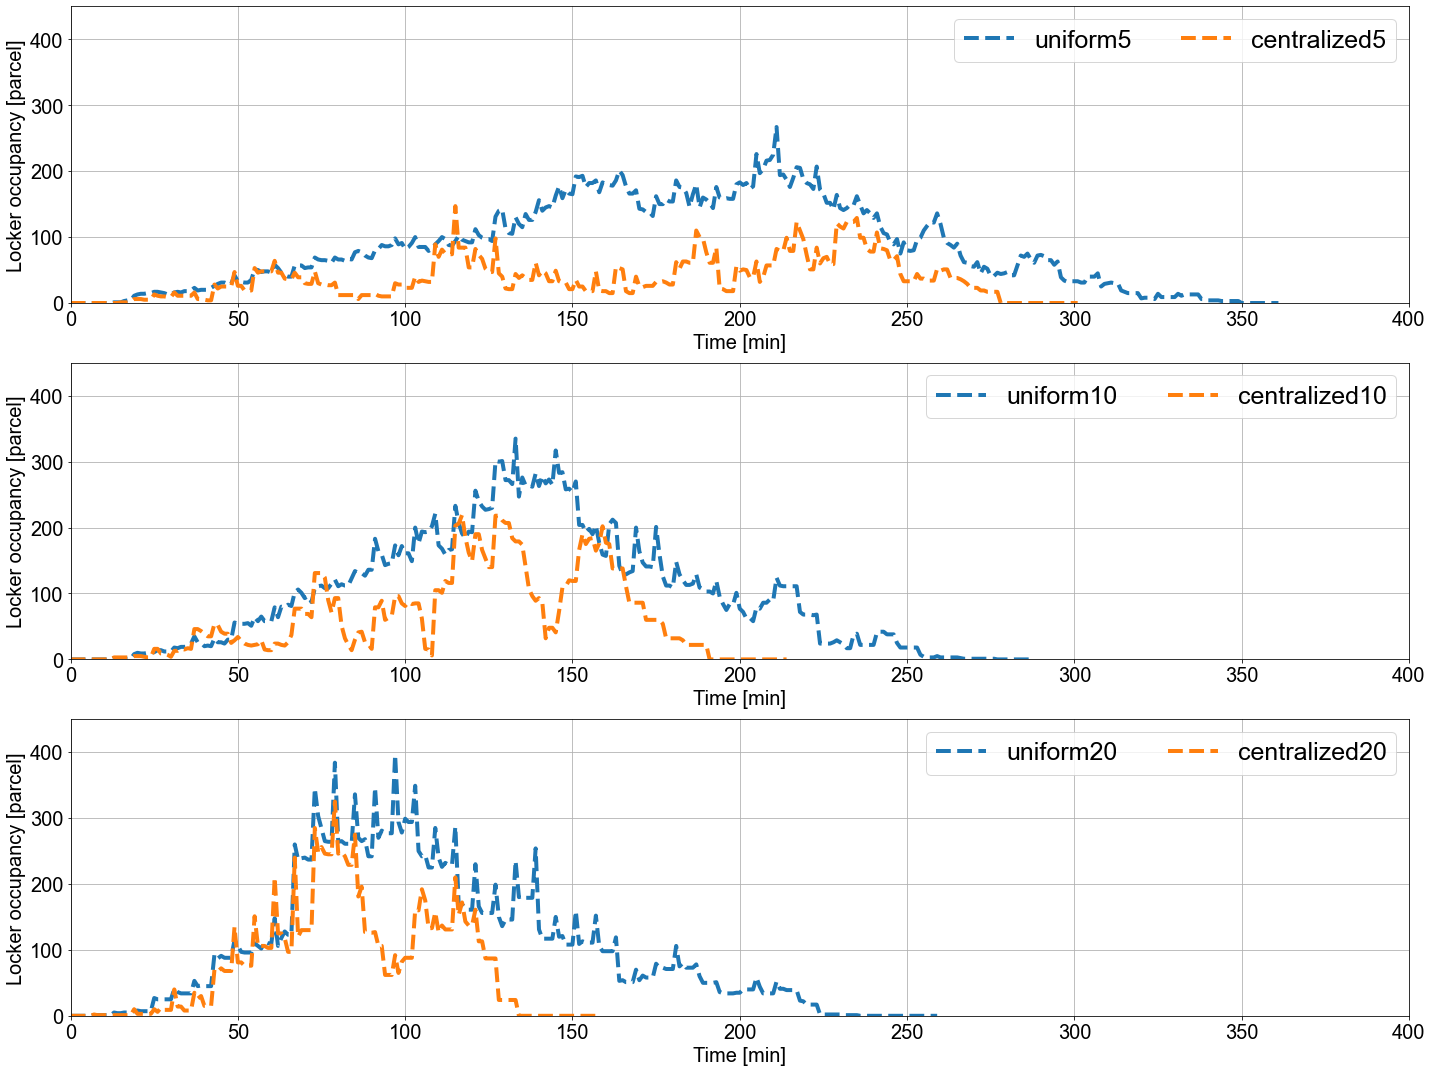

In [3]:
##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################

def calculate_distance(schedule):

    tt_dis=0

    trajectory=list(schedule.values())

    for i in range(1, len(trajectory),1):

        tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))

    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 25}

figure, axs = plt.subplots(3,1,figsize=(20,15))

for i in range(3):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(20) for label in labels]

    [label.set_fontname('Arial') for label in labels]
    
    axs[i].grid()

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

##########################################################################################
##########################################################################################


figure_idx=0

##########################################################################################
##########################################################################################


colors=['blue','red','green']


##########################################################################################
##########################################################################################

widths=[-0.25,0,0.25]

for lambda_value in lambda_values:

    for pattern in patterns:

        ##########################################################################################
        ##########################################################################################

        instance_name=pattern+str(lambda_value)

        ##########################################################################################
        ##########################################################################################

        for i in range(len(save_paths)):

            ##########################################################################################
            ##########################################################################################

            Courier_occupancy={}

            ##########################################################################################
            ##########################################################################################

            save_path=save_paths[i]

            save_path=save_path+pattern+'_'+str(lambda_value)

            ##########################################################################################
            ##########################################################################################

            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

            ##########################################################################################
            ##########################################################################################
            
            Locker_waiting={locker:{t:0 for t in range(int(parcel_df.drop_off_time.max()+1))} for locker in Lockers}

            for parcel_id,parcel_schedule in parcel_schedules.items():
                
                schedule=list(parcel_schedule.values())

                if len(schedule)>1:

                    for k in range(1,len(schedule),1):

                        cur_schedule=schedule[k]

                        pre_schedule=schedule[k-1]

                        locker=pre_schedule['drop_off'][0]

                        drop_off_time=int(pre_schedule['drop_off'][1])

                        pick_up_time=int(cur_schedule['pick_up'][1])

                        for t in range(drop_off_time,pick_up_time+1,1):

                            Locker_waiting[locker][t]=Locker_waiting[locker][t]+1
                            
            ##########################################################################################
            ##########################################################################################
                                
        ##########################################################################################
        ##########################################################################################
        
        occupancy_df=pd.DataFrame(Locker_waiting)
            
        occupancy_df=occupancy_df.fillna(0)

        occupancy_df['sum_occupancy'] = occupancy_df.sum(axis=1)

        occupancy_df['t']=occupancy_df.index

        ##########################################################################################
        ##########################################################################################

        axs[figure_idx].plot(occupancy_df.t, occupancy_df.sum_occupancy,linewidth=4,linestyle='--',label=instance_name)

        ##########################################################################################
        ##########################################################################################

        axs[figure_idx].set_xlabel('Time [min]',font_label)

        axs[figure_idx].set_ylabel("Locker occupancy [parcel]",font_label)
        
        ##########################################################################################
        ##########################################################################################

        axs[figure_idx].legend(loc ='upper right',prop=font_legend,ncol=3)

        ##########################################################################################
        ##########################################################################################

        axs[figure_idx].set_ylim([0,450])

        axs[figure_idx].set_xlim([0,400])

        xmajorLocator  = MultipleLocator(50)

        axs[figure_idx].xaxis.set_major_locator(xmajorLocator)
        
        ymajorLocator  = MultipleLocator(100)

        axs[figure_idx].yaxis.set_major_locator(ymajorLocator)

        ##########################################################################################
        ##########################################################################################

        
    figure_idx+=1
        


##########################################################################################
##########################################################################################



plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/09locker_occupancy.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()

### box chart of waiting parrcels in the network

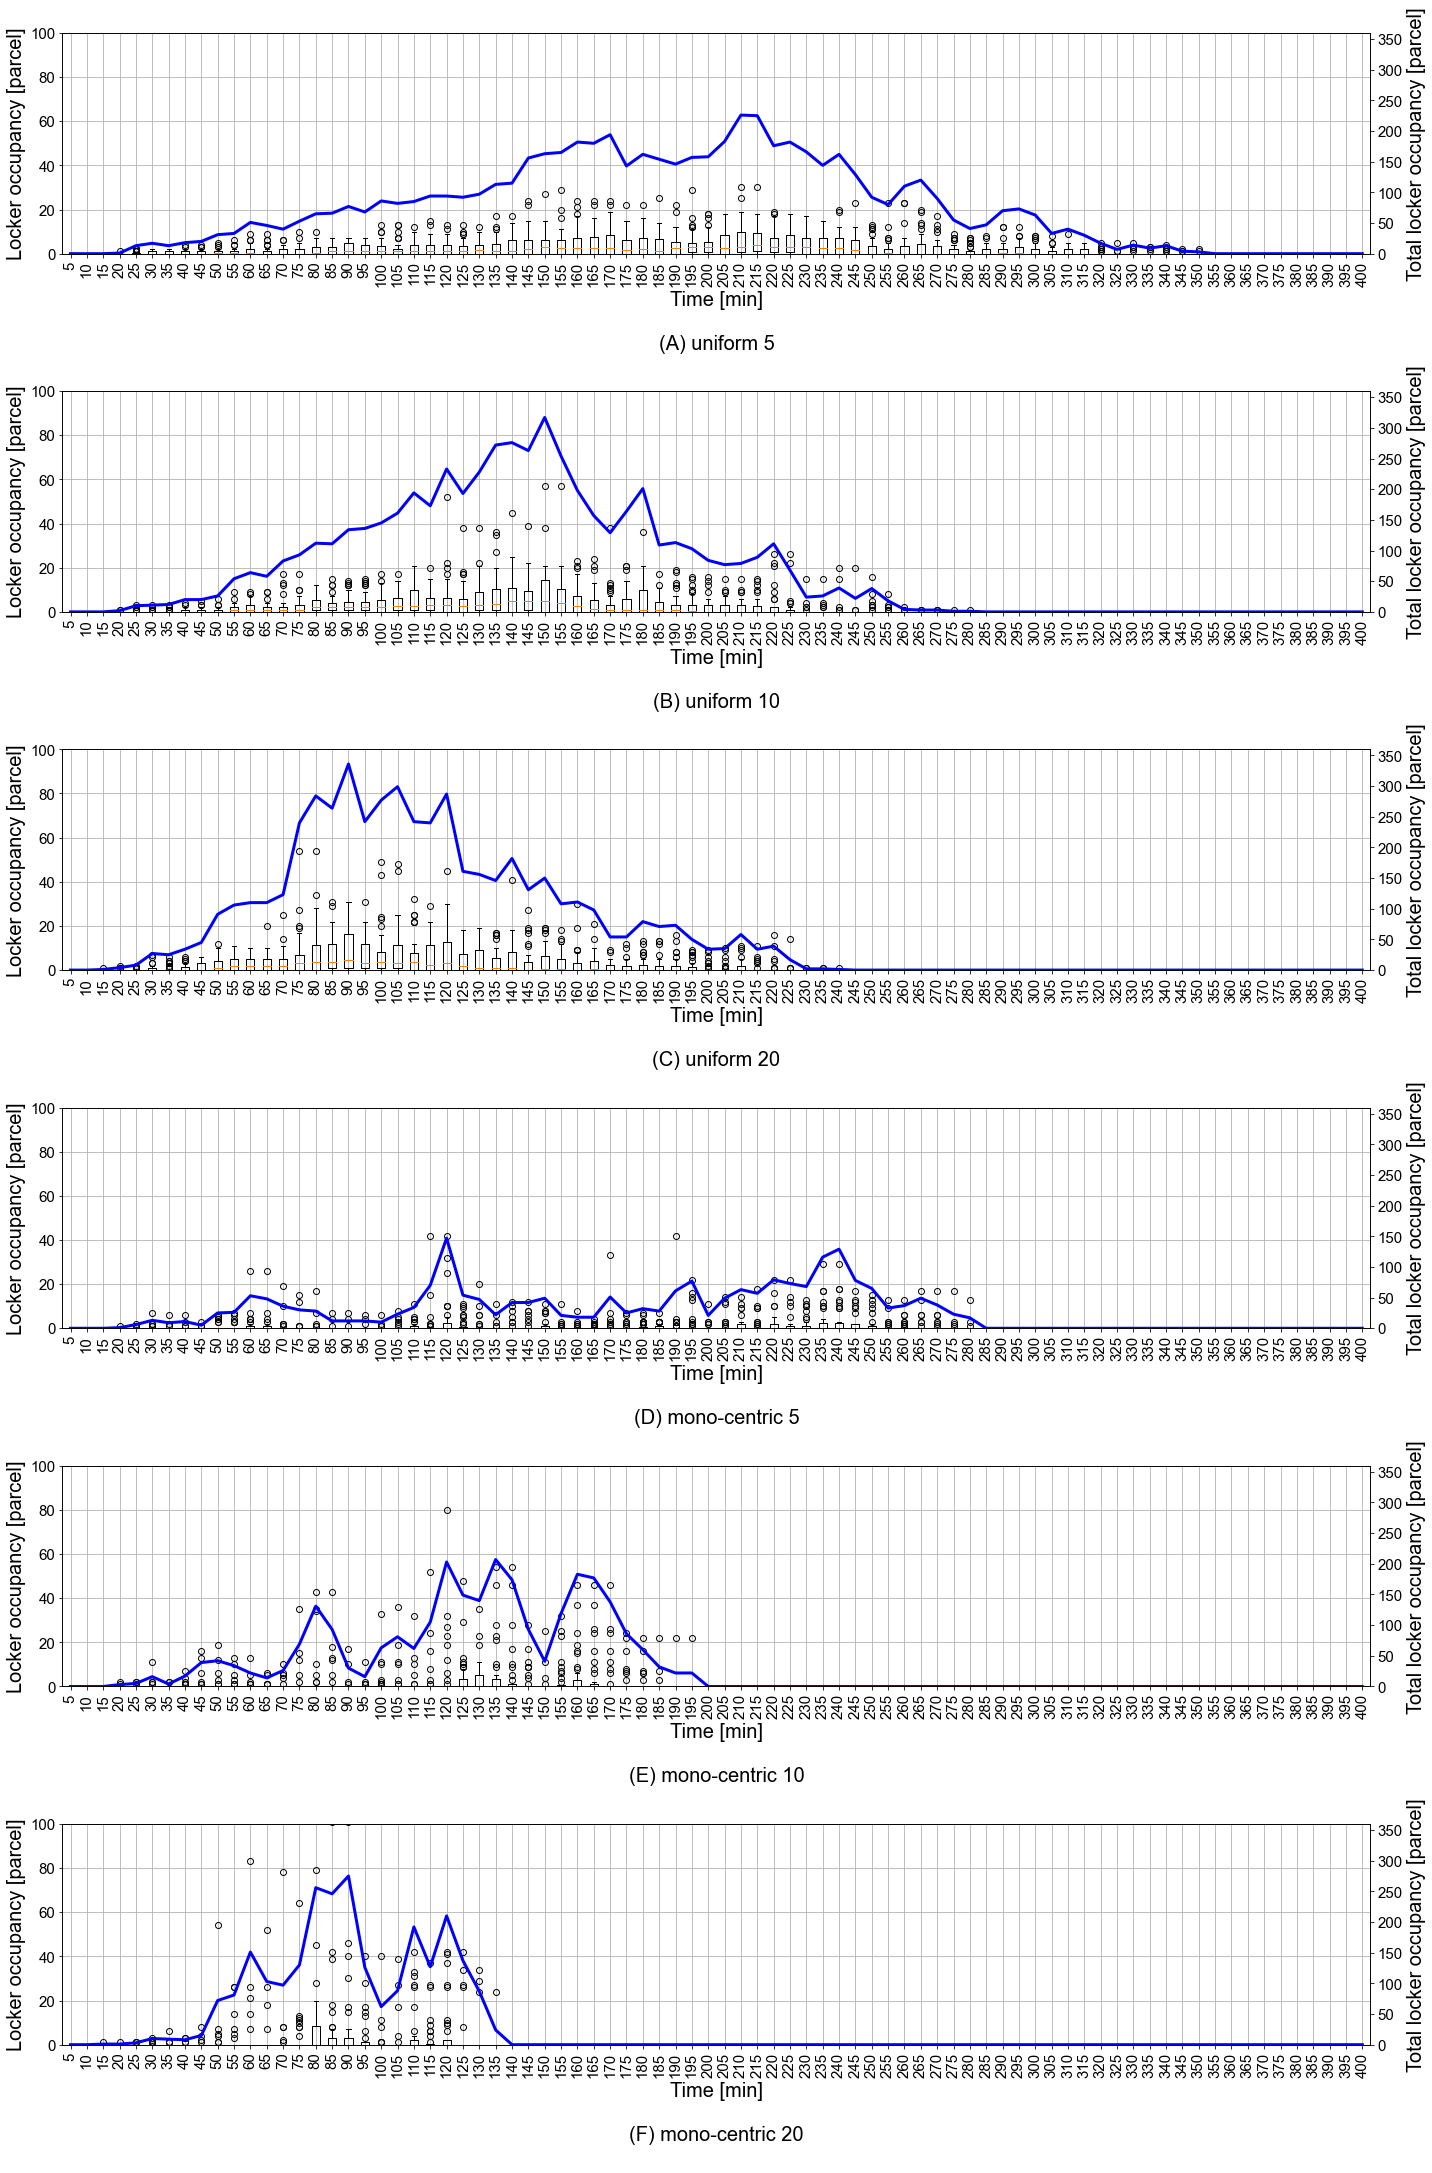

In [22]:
##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################

def calculate_distance(schedule):

    tt_dis=0

    trajectory=list(schedule.values())

    for i in range(1, len(trajectory),1):

        tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))

    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 25}

figure, axs = plt.subplots(6,1,figsize=(20,30))

for i in range(6):

    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()

    [label.set_fontsize(15) for label in labels]

    [label.set_fontname('Arial') for label in labels]
    
    axs[i].grid()

##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']

##########################################################################################
##########################################################################################


figure_idx=0

##########################################################################################
##########################################################################################


colors=['blue','red','green']

##########################################################################################
##########################################################################################

total_intervals=80


##########################################################################################
##########################################################################################

widths=[-0.25,0,0.25]

for pattern in patterns:

    for lambda_value in lambda_values:

        ##########################################################################################
        ##########################################################################################

        instance_name=pattern+" "+str(lambda_value)
        
        if 'centralized' in instance_name:
            
            instance_name='mono-centric'+" "+str(lambda_value)

        ##########################################################################################
        ##########################################################################################

        for i in range(len(save_paths)):

            ##########################################################################################
            ##########################################################################################

            Courier_occupancy={}

            ##########################################################################################
            ##########################################################################################

            save_path=save_paths[i]

            save_path=save_path+pattern+'_'+str(lambda_value)

            ##########################################################################################
            ##########################################################################################

            parcel_df=pd.read_csv(save_path+"/parcel_df_"+str(alpha)+"_"+str(batch_interval)+".csv")

            parcel_df=parcel_df.drop(columns=['Unnamed: 0'])
            
            ##########################################################################################
            ##########################################################################################

            parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

            ##########################################################################################
            ##########################################################################################
            
            Locker_waiting={t:{locker:0 for locker in Lockers} for t in range(int(parcel_df.drop_off_time.max()+1))}
            
            for parcel_id,parcel_schedule in parcel_schedules.items():
                
                schedule=list(parcel_schedule.values())

                if len(schedule)>1:

                    for k in range(1,len(schedule),1):

                        cur_schedule=schedule[k]

                        pre_schedule=schedule[k-1]

                        locker=pre_schedule['drop_off'][0]

                        drop_off_time=int(pre_schedule['drop_off'][1])

                        pick_up_time=int(cur_schedule['pick_up'][1])

                        for t in range(drop_off_time,pick_up_time+1,1):

                            Locker_waiting[t][locker]=Locker_waiting[t][locker]+1
                            
            ##########################################################################################
            ##########################################################################################
            
        occupancy_array=[[x for x in v.values()]for k,v in Locker_waiting.items() if k%5==0]
        
        while len(occupancy_array)<total_intervals:
            
            occupancy_array.append([0,0])
            
        sum_occupancy_array=[sum(arr) for arr in occupancy_array]
        

        ##########################################################################################
        ##########################################################################################

        axs[figure_idx].boxplot(occupancy_array)

        ##########################################################################################
        ##########################################################################################

        axs[figure_idx].set_xlabel('Time [min]\n\n'+labels[figure_idx]+' '+instance_name+'\n',font_label)

        axs[figure_idx].set_ylabel("Locker occupancy [parcel]",font_label)

        ##########################################################################################
        ##########################################################################################

        axs[figure_idx].set_ylim([0,100])
        
        axs[figure_idx].set_xticks(list(range(1,total_intervals+1,1)))

        axs[figure_idx].set_xticklabels([k*5 for k in list(range(1,total_intervals+1,1))], rotation=90)

        ##########################################################################################
        ##########################################################################################
        
        twin_axs =  axs[figure_idx].twinx()
        
        tick_labels = twin_axs.get_xticklabels() + twin_axs.get_yticklabels()

        [label.set_fontsize(15) for label in tick_labels]

        [label.set_fontname('Arial') for label in tick_labels]
        
        ##########################################################################################
        ##########################################################################################
        
        twin_axs.plot(list(range(1,total_intervals+1,1)), sum_occupancy_array, color='blue',linewidth=3)
        
        twin_axs.set_ylim([0,360])
        
        twin_axs.set_xticks(list(range(1,total_intervals+1,1)))
        
        twin_axs.set_xticklabels([k*5 for k in list(range(1,total_intervals+1,1))], rotation=90)
        
        twin_axs.set_ylabel("Total locker occupancy [parcel]",font_label)
        

        ##########################################################################################
        ##########################################################################################

        figure_idx+=1
        

##########################################################################################
##########################################################################################


plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/09locker_occupancy.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()